**Cross-Industry Standard Process for Data Mining - Amazon AWS SaaS Sales Dataset**

**Business understanding and data understanding**

In [4]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('SaaS-Sales.csv')

Saving SaaS-Sales.csv to SaaS-Sales (2).csv


In [5]:
# Display the first few rows of the dataset
data.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


**Data Analysis & Visualization**

In [6]:
# Get basic statistics for numeric columns
data.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


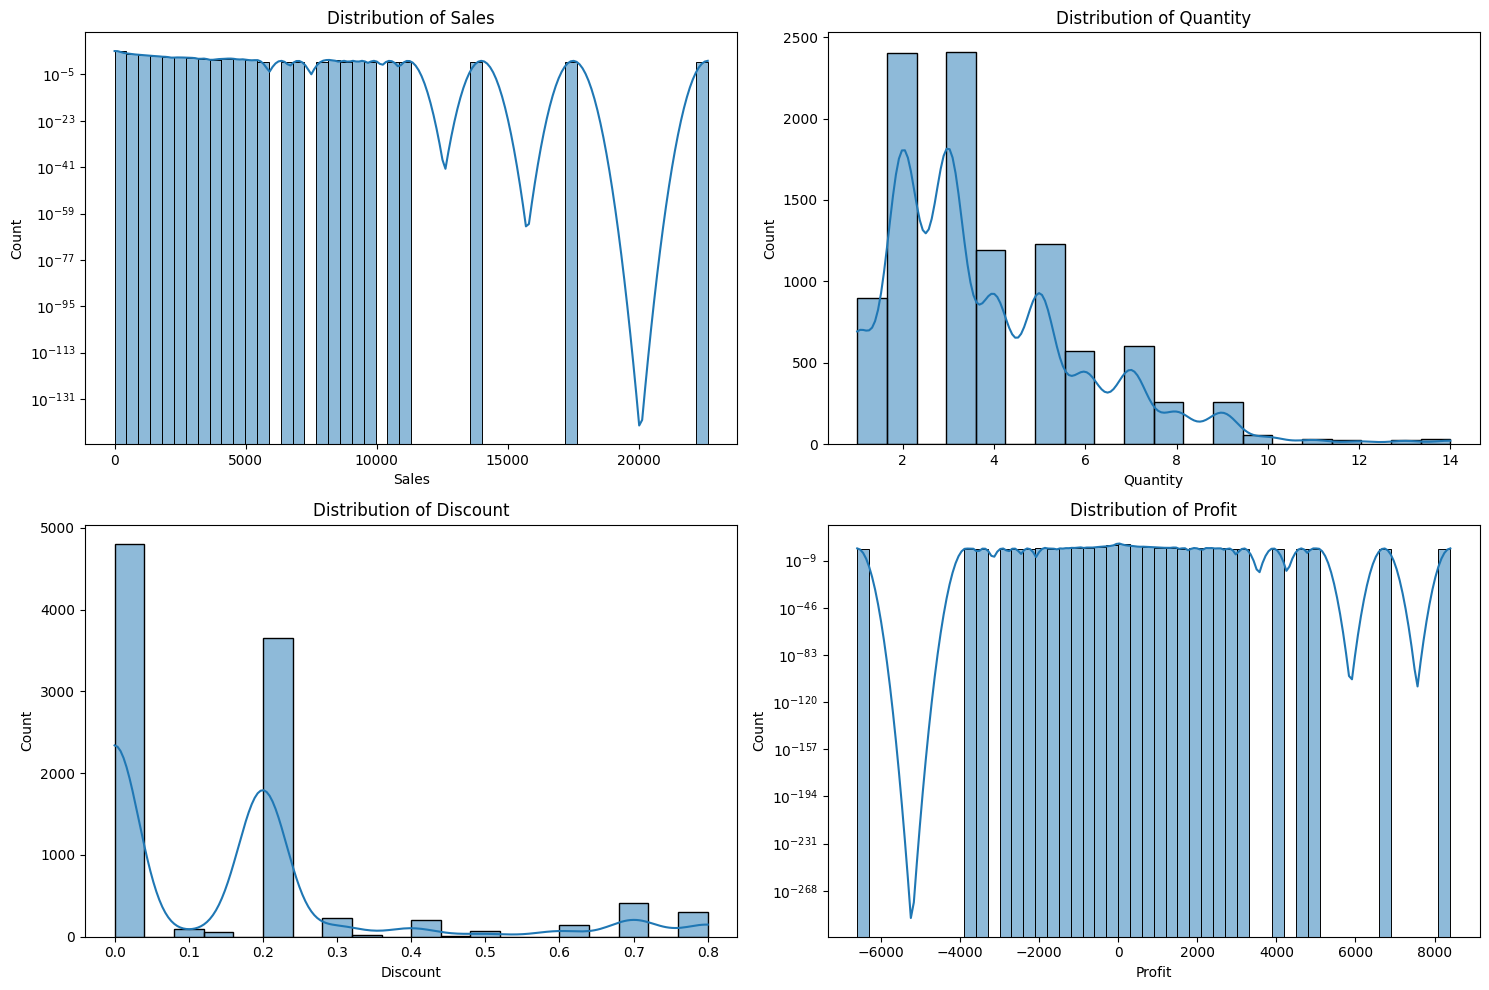

In [7]:
# Setting up the figure and axes
fig, ax = plt.subplots(2, 2, figsize=(15,10))

# Plotting the distribution for 'Sales'
sns.histplot(data['Sales'], bins=50, kde=True, ax=ax[0,0])
ax[0,0].set_title('Distribution of Sales')
ax[0,0].set_yscale('log')  # Using a logarithmic scale for better visualization

# Plotting the distribution for 'Quantity'
sns.histplot(data['Quantity'], bins=20, kde=True, ax=ax[0,1])
ax[0,1].set_title('Distribution of Quantity')

# Plotting the distribution for 'Discount'
sns.histplot(data['Discount'], bins=20, kde=True, ax=ax[1,0])
ax[1,0].set_title('Distribution of Discount')

# Plotting the distribution for 'Profit'
sns.histplot(data['Profit'], bins=50, kde=True, ax=ax[1,1])
ax[1,1].set_title('Distribution of Profit')
ax[1,1].set_yscale('log')  # Using a logarithmic scale for better visualization

plt.tight_layout()
plt.show()


In [8]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

**Data Preparation**

In [9]:
# Check data types of the columns
data.dtypes

Row ID            int64
Order ID         object
Order Date       object
Date Key          int64
Contact Name     object
Country          object
City             object
Region           object
Subregion        object
Customer         object
Customer ID       int64
Industry         object
Segment          object
Product          object
License          object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

**Data Cleaning**

In [10]:
# Convert 'Order Date' column to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Verify the data types again
data.dtypes

Row ID                   int64
Order ID                object
Order Date      datetime64[ns]
Date Key                 int64
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID              int64
Industry                object
Segment                 object
Product                 object
License                 object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object

**Data Preprocessing**

In [11]:
# Extract year from 'Order Date'
data['Year'] = data['Order Date'].dt.year

# Filter data for the last 2 years
latest_year = data['Year'].max()
data_filtered = data[data['Year'] > latest_year - 2]

# Display the first few rows of the filtered data
data_filtered.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.960,2,0.0,41.9136,2022
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.940,3,0.0,219.5820,2022
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.620,2,0.0,6.8714,2022
12,13,EMEA-2023-114412,2023-04-16,20230416,Adrian Hunter,Sweden,Stockholm,EMEA,NOR,Engie,1062,Energy,SMB,Support,FE5QJBIUN1,15.552,3,0.2,5.4432,2023
13,14,AMER-2022-161389,2022-12-06,20221206,Adrian Abraham,Canada,Toronto,AMER,NAMER,Microsoft,1066,Tech,SMB,ContactMatcher,COK66F8IC1,407.976,3,0.2,132.5922,2022


**Data Clustering**

In [12]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns for clustering
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit']
data_clustering = data_filtered[numeric_columns]

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

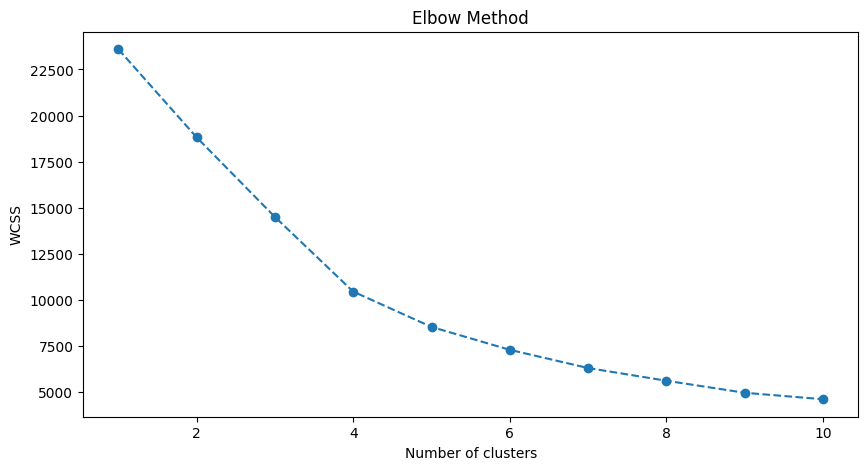

In [13]:
from sklearn.cluster import KMeans

# Calculate WCSS for different number of clusters again
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_standardized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method again
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-14-2fc163cd6c0f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Cluster'] = clusters


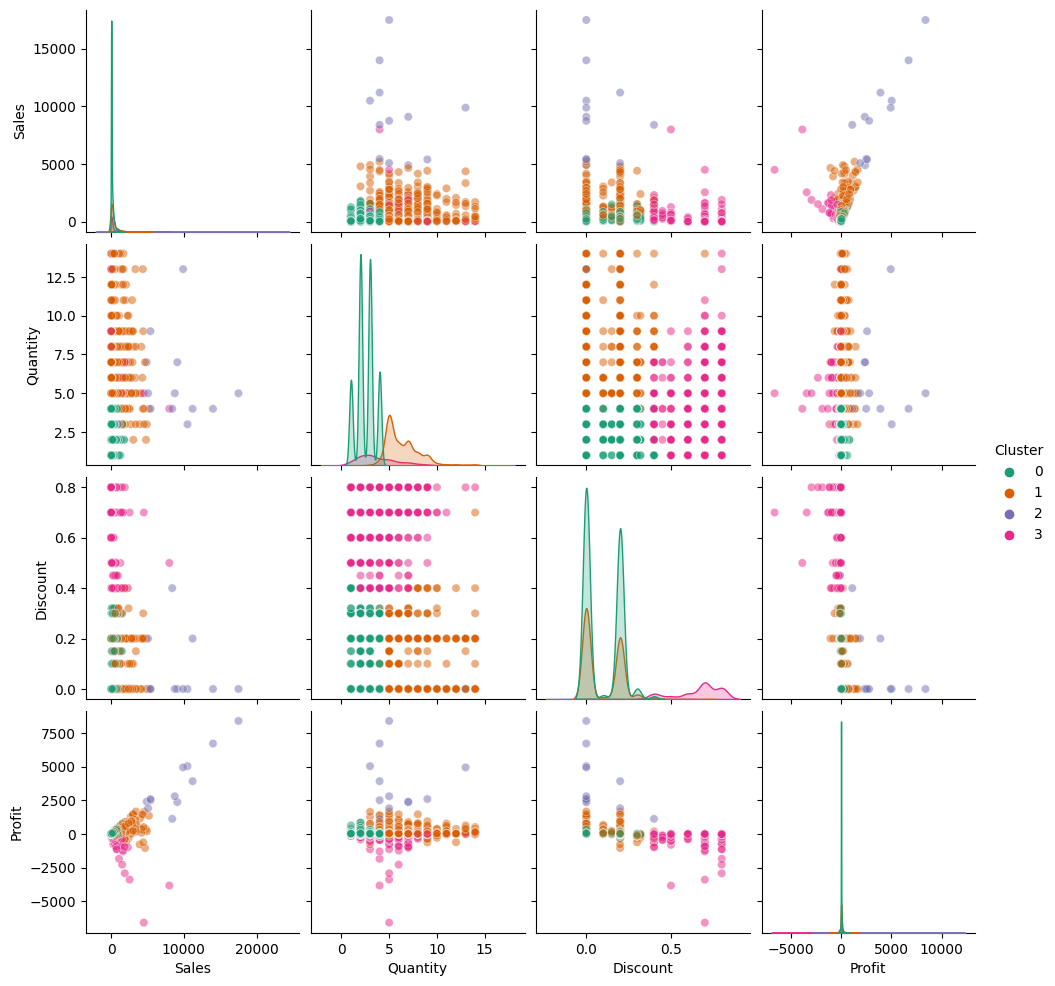

In [14]:
# Apply KMeans clustering with 4 clusters again
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_standardized)
data_filtered['Cluster'] = clusters

# Visualize the clusters using a pairplot
sns.pairplot(data=data_filtered, hue='Cluster', vars=numeric_columns, palette='Dark2', plot_kws={'alpha': 0.5})
plt.show()

*Outlier Analysis and Processing*

In [15]:
# Calculate IQR for 'Profit' for outlier detection
Q1 = data_filtered['Profit'].quantile(0.25)
Q3 = data_filtered['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_profit = data_filtered[(data_filtered['Profit'] < lower_bound) | (data_filtered['Profit'] > upper_bound)]

# Display number of outliers
num_outliers_profit = len(outliers_profit)

num_outliers_profit


1122

In [20]:
# Cap the outliers for the 'Profit' column
data_filtered['Profit'] = np.where(data_filtered['Profit'] < lower_bound, lower_bound, data_filtered['Profit'])
data_filtered['Profit'] = np.where(data_filtered['Profit'] > upper_bound, upper_bound, data_filtered['Profit'])

# Verify the changes
data_filtered['Profit'].describe()

<ipython-input-20-2e1cb5ab3918>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Profit'] = np.where(data_filtered['Profit'] < lower_bound, lower_bound, data_filtered['Profit'])
<ipython-input-20-2e1cb5ab3918>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Profit'] = np.where(data_filtered['Profit'] > upper_bound, upper_bound, data_filtered['Profit'])


count    5899.000000
mean       15.669144
std        28.666937
min       -38.431150
25%         1.797500
50%         8.502500
75%        28.616600
max        68.845250
Name: Profit, dtype: float64

**Regression for Prediction of Discount**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define predictors and target variable
X = data_filtered[['Sales', 'Quantity', 'Profit']]
y = data_filtered['Discount']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate the mean squared error (MSE) of the predictions
mse = mean_squared_error(y_test, y_pred)

mse

0.030812206315525902

**Associative Pattern Matching**

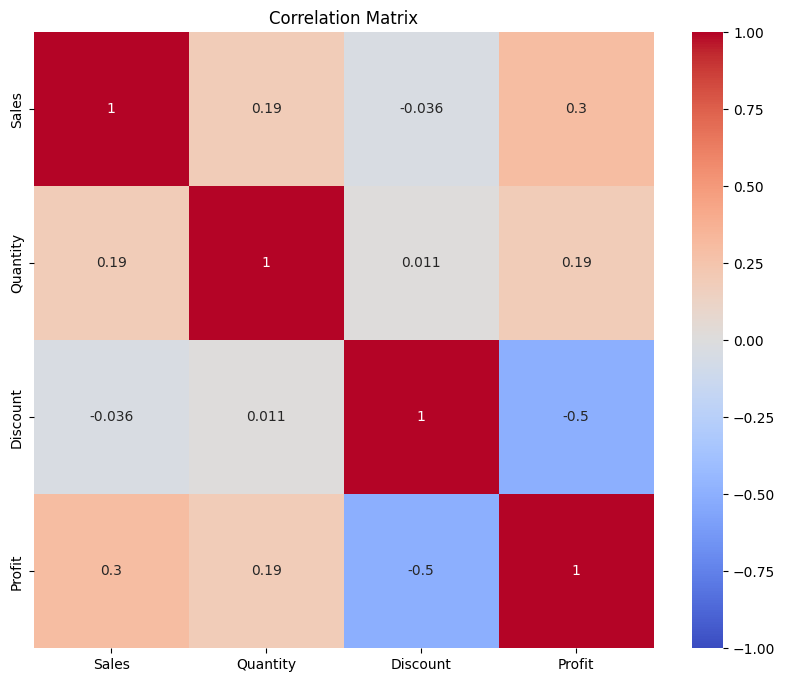

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# Compute the correlation matrix
correlation_matrix = data_filtered[numeric_columns].corr()
# Visualize the correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Locality-Sensitive Hashing (LSH) for Efficient Similarity Search

In [24]:
from sklearn.random_projection import SparseRandomProjection

# Create a random projection
transformer = SparseRandomProjection(n_components=2)
data_projected = transformer.fit_transform(data_standardized)

# Convert projected data into binary (for simplicity, we'll threshold at zero)
data_binary = np.where(data_projected > 0, 1, 0)

# For demonstration, let's find rows that are similar to the first row
target = data_binary[0]
similar_rows = (data_binary == target).all(axis=1)

# Return indices of similar rows
similar_indices = np.where(similar_rows)[0]

similar_indices

array([   0,    4,   29,   35,   38,  104,  106,  151,  161,  165,  201,
        242,  260,  286,  302,  321,  333,  337,  346,  363,  365,  386,
        533,  535,  543,  544,  547,  576,  599,  616,  666,  673,  678,
        684,  702,  705,  713,  717,  719,  733,  752,  780,  839,  863,
        961, 1075, 1077, 1081, 1098, 1112, 1120, 1125, 1131, 1134, 1143,
       1158, 1177, 1190, 1211, 1241, 1259, 1288, 1314, 1321, 1324, 1338,
       1351, 1381, 1400, 1413, 1417, 1420, 1455, 1523, 1530, 1571, 1585,
       1587, 1602, 1745, 1747, 1755, 1774, 1837, 1846, 1847, 1945, 1952,
       1987, 1992, 1994, 2002, 2017, 2026, 2033, 2110, 2113, 2129, 2144,
       2211, 2234, 2239, 2283, 2291, 2341, 2347, 2361, 2367, 2374, 2492,
       2519, 2525, 2582, 2604, 2626, 2629, 2639, 2641, 2644, 2656, 2671,
       2674, 2686, 2724, 2747, 2752, 2765, 2769, 2796, 2847, 2888, 2938,
       2959, 2971, 2974, 2977, 2994, 3023, 3051, 3088, 3109, 3129, 3150,
       3170, 3210, 3227, 3338, 3343, 3360, 3405, 34

**Modeling**

In [26]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train a Decision Tree regressor
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0.37994737, 0.08635097, 0.01025641, ..., 0.24373333, 0.14958449,
       0.10265487])

**Evaluation**

In [28]:
# Calculate the mean squared error (MSE) for the Decision Tree predictions
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_comparison = {'Linear Regression': mse, 'Decision Tree': mse_dt}
mse_comparison

{'Linear Regression': 0.030812206315525902,
 'Decision Tree': 0.010020357256957685}

**Deployment**

In [29]:
from joblib import dump

# Save the trained Decision Tree model to a file
model_filename = 'decision_tree_model.joblib'
dump(dt, model_filename)

['decision_tree_model.joblib']